In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
import numpy as np
import seaborn as sns
warnings.filterwarnings('ignore')

In [10]:
dt = pd.read_csv('./data/sex.csv',index_col=0)
dt.dropna(axis=1,inplace=True)

dt

,구분,2005,2005건강,2005재정,2005관계,2005가정,2005사회,2006,2006건강,2006재정,...,2020재정,2020관계,2020가정,2020사회,2021,2021건강,2021재정,2021관계,2021가정,2021사회
0,남자,6.41,6.78,5.14,6.72,6.88,6.50,6.48,6.82,5.26,...,5.97,6.61,6.66,6.44,6.29,6.69,5.73,6.38,6.45,6.21
1,여자,6.29,6.44,5.08,6.70,6.84,6.38,6.32,6.45,5.15,...,6.01,6.67,6.67,6.41,6.25,6.56,5.68,6.39,6.45,6.19


In [11]:
sex_year = pd.DataFrame()
years = ['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021'] 


for y in years:
    df = dt.melt(id_vars='구분',value_vars=y,var_name='년도',value_name='소계')
    sex_year = pd.concat([sex_year,df],axis=0)

sex_year.sort_values(['구분','년도'],inplace=True)
sex_year.reset_index(drop=True, inplace=True)
sex_year['소계'] = sex_year['소계'].astype(float)

male_year = sex_year.iloc[0:10,:]
female_year = sex_year.iloc[10:,:]

female_year.reset_index(drop=True, inplace=True)

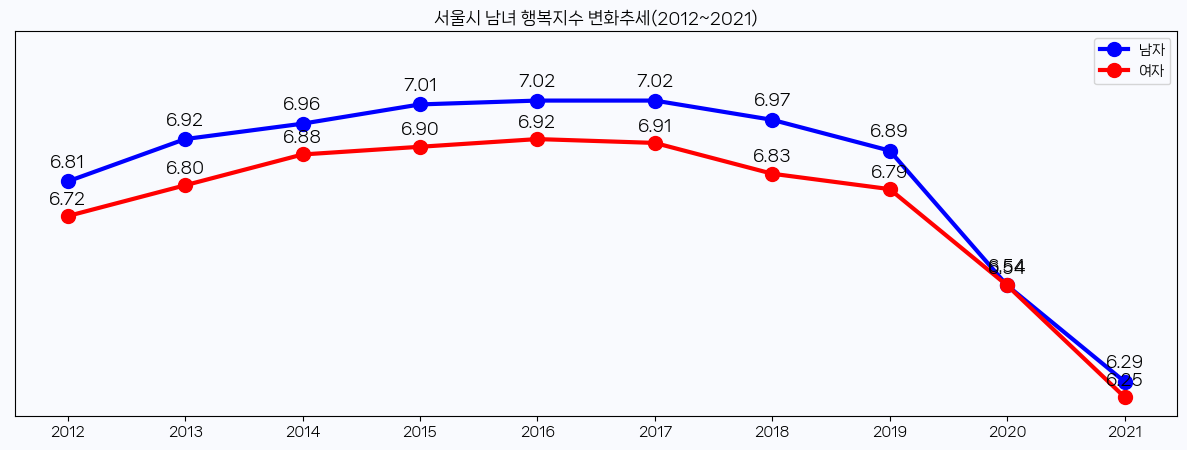

In [12]:
plt.figure(figsize=(15,5))
mpl.rc('axes', facecolor = '#F9FAFE', edgecolor = 'k')
mpl.rc('figure', facecolor = '#F9FAFE', edgecolor ='#F9FAFE')
plt.gca().axes.yaxis.set_visible(False)

plt.plot(male_year['년도'], male_year['소계'],'bo-',markersize=10,linewidth=3,label='남자')
x = male_year['년도']
y = male_year['소계']
for i in range(len(x)):
    height = y[i]
    plt.text(x[i],height + 0.03, '%.2f' %height, ha='center',va='bottom',size=12)
    
plt.plot(female_year['년도'],female_year['소계'],'ro-',markersize=10,linewidth=3,label='여자')
x = female_year['년도']
y = female_year['소계']
for i in range(len(x)):
    height = y[i]
    plt.text(x[i],height + 0.025, '%.2f' %height, ha='center',va='bottom',size=12)
    
plt.legend()
plt.title('서울시 남녀 행복지수 변화추세(2012~2021)')

plt.ylim(6.2,7.2)

# plt.savefig('./pne/서울시남녀행복지수.png')
plt.show()

In [13]:
year = ['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
labels= ['건강','재정','관계','가정','사회']
index = np.arange(len(labels))
colors = ['#3AB0FF', '#FFB562', '#F87474', '#F4E06D','#C499BA']

# 남성

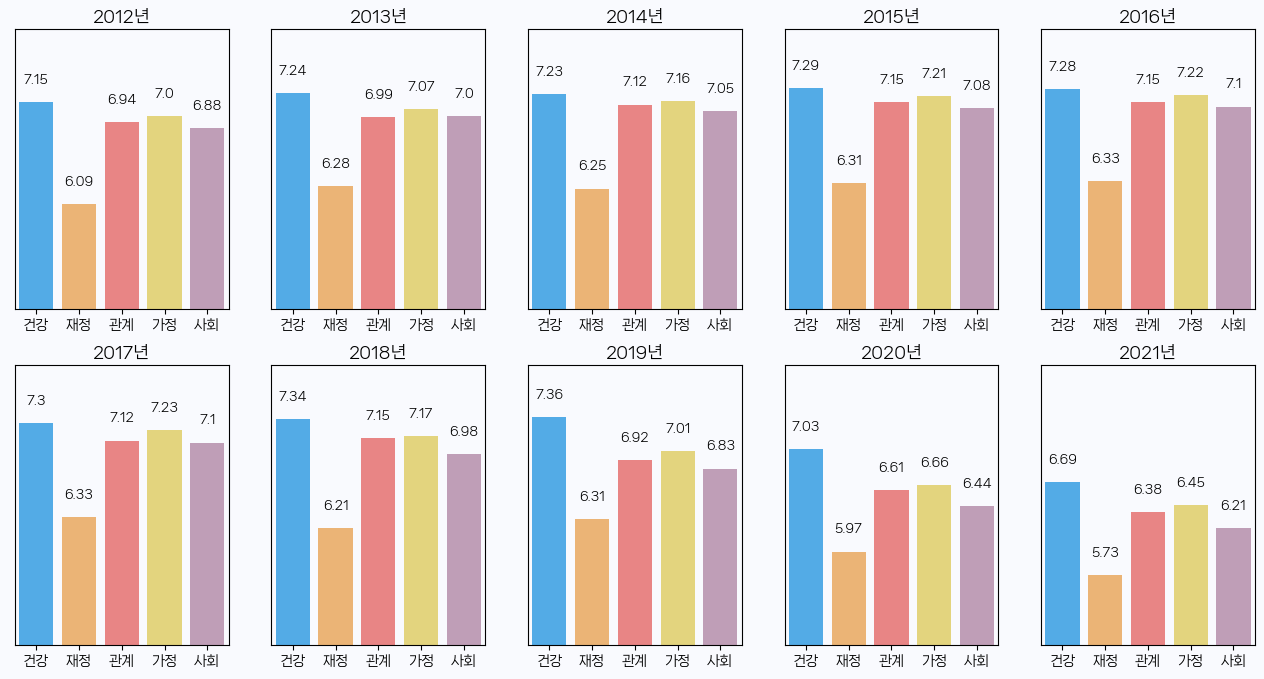

In [14]:
plt.figure(figsize=(16,8))
#그래프 내부 배경 색

mpl.rc('axes', facecolor = '#F9FAFE', edgecolor = 'k')

#그래프 외부 배경 색

mpl.rc('figure', facecolor = '#F9FAFE', edgecolor ='#F9FAFE')
for i,y in enumerate(year):
    pie = pd.DataFrame(dt.loc[0,f'{y}':f'{y}사회'])
    pie.rename(columns={0:'idx'},inplace=True)
    pie.drop(index=y,inplace=True)
    # print(pie.iloc[:,:])
    
    i += 1
    plt.subplot(2,5,i)
    g = sns.barplot(data=pie,x=labels,y='idx',palette=colors)
    ax = g
    ax.get_yaxis().set_visible(False)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height+0.2, height, ha = 'center', size = 9)

    plt.title(f'{y}년')
    plt.ylim(5,7.9)
    plt.ylabel('')
    plt.xticks(index, labels)

plt.savefig('./png/male.png')
plt.show()

# 여성


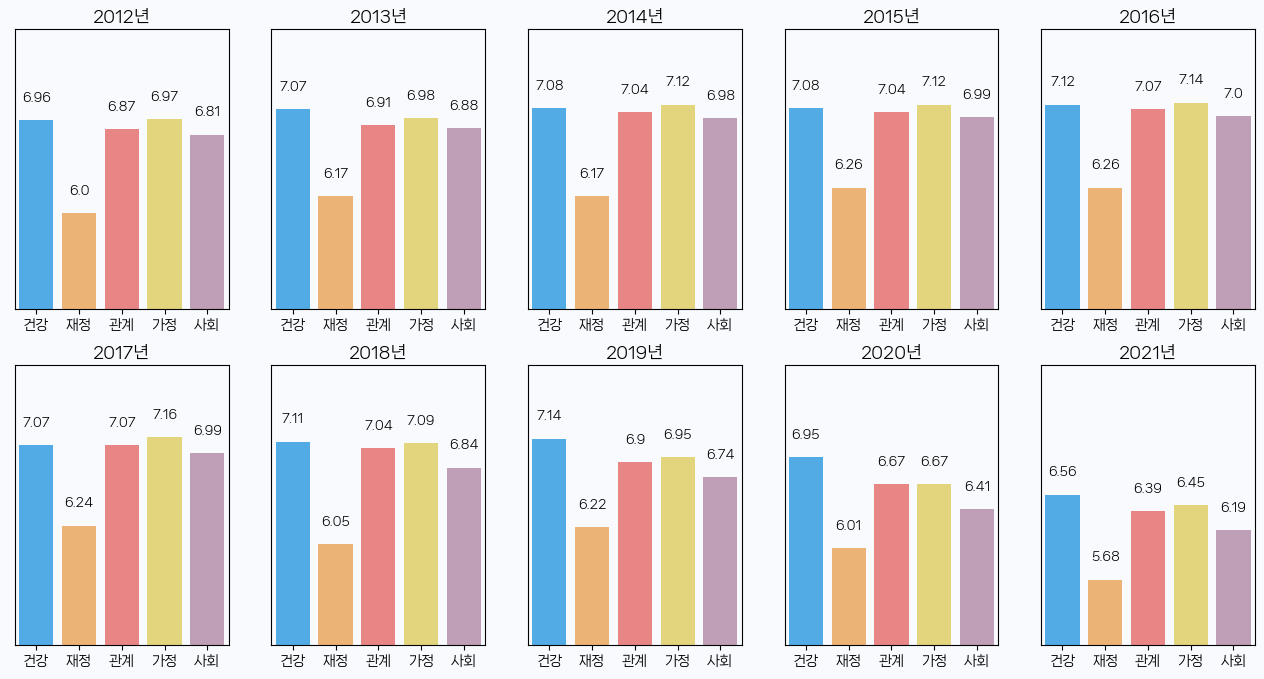

In [15]:
plt.figure(figsize=(16,8))
#그래프 내부 배경 색

mpl.rc('axes', facecolor = '#F9FAFE', edgecolor = 'k')

#그래프 외부 배경 색

mpl.rc('figure', facecolor = '#F9FAFE', edgecolor ='#F9FAFE')
for i,y in enumerate(year):
    pie = pd.DataFrame(dt.loc[1,f'{y}':f'{y}사회'])
    pie.rename(columns={1:'idx'},inplace=True)
    pie.drop(index=y,inplace=True)
    # print(pie.iloc[:,:])
    
    i += 1
    plt.subplot(2,5,i)
    g = sns.barplot(data=pie,x=labels,y='idx',palette=colors)
    ax = g
    ax.get_yaxis().set_visible(False)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height+0.2, height, ha = 'center', size = 9)

    plt.title(f'{y}년')
    plt.ylim(5,7.9)
    plt.ylabel('')
    plt.xticks(index, labels)

# plt.savefig('./png/female.png')
plt.show()